In [1]:
from pandas import read_excel
read_excel('./data/Welding Data Set_01.xlsx')

,idx,Machine_Name,Item No,working time,Thickness 1(mm),Thickness 2(mm),weld force(bar),weld current(kA),weld Voltage(v),weld time(ms)
0,1,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.33,14.57,2.701,72.0
1,2,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.36,14.57,2.701,72.0
2,3,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.37,14.54,2.703,71.0
3,4,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.37,14.54,2.703,72.0
4,5,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.36,14.56,2.704,72.0
...,...,...,...,...,...,...,...,...,...,...
11934,665,Spot-01,65235-25800,2020-04-07,0.7,0.7,2.37,14.55,2.702,72.0
11935,666,Spot-01,65235-25800,2020-04-07,0.7,0.7,2.37,14.60,2.712,72.0
11936,667,Spot-01,65235-25800,2020-04-07,0.7,0.7,2.37,14.60,2.712,71.0
11937,668,Spot-01,65235-25800,2020-04-07,0.7,0.7,2.35,14.53,2.712,71.0


In [2]:
## 필요한 패키지 설치
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch
import numpy as np
import pandas as pd
import sklearn.metrics as metric
from sklearn import preprocessing
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
##pandas의 read_excel함수를 사용하여 데이터 불러옴, 또한 index_col = “열 이름” 을 사용하여 인덱스 열 설정
welding_data = pd.read_excel("./data/Welding Data Set_01.xlsx", index_col ="idx")
welding_data.head()
#결과는 아래에서 확인 가능하다.

,Machine_Name,Item No,working time,Thickness 1(mm),Thickness 2(mm),weld force(bar),weld current(kA),weld Voltage(v),weld time(ms)
idx,,,,,,,,,
1,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.33,14.57,2.701,72.0
2,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.36,14.57,2.701,72.0
3,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.37,14.54,2.703,71.0
4,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.37,14.54,2.703,72.0
5,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.36,14.56,2.704,72.0


In [4]:
## 데이터의 특성들이 어떤 값들을 가지고 있으며 몇 개씩 가지고 있는지 확인
for feature in welding_data:
     print(feature, welding_data[feature].value_counts()) #결과는 아래에서 확인 가능하다.

Machine_Name Spot-01    11939
Name: Machine_Name, dtype: int64
Item No 65235-25800    11939
Name: Item No, dtype: int64
working time 2020-04-02    2000
2020-03-31    1800
2020-03-27    1648
2020-03-30    1470
2020-03-25    1352
2020-03-24    1200
2020-03-26    1000
2020-04-03     800
2020-04-07     669
Name: working time, dtype: int64
Thickness 1(mm) 0.7    11939
Name: Thickness 1(mm), dtype: int64
Thickness 2(mm) 0.7    11939
Name: Thickness 2(mm), dtype: int64
weld force(bar) 2.31    1237
2.33    1062
2.35    1047
2.32    1036
2.36    1030
        ... 
2.86       4
6.72       4
2.23       2
2.19       2
2.36       2
Name: weld force(bar), Length: 177, dtype: int64
weld current(kA) 14.73    1284
14.74    1276
14.75    1002
14.72     771
14.59     630
14.76     612
14.71     553
14.58     544
14.60     431
14.57     378
14.77     350
14.78     318
14.70     312
14.56     296
14.55     278
14.61     260
14.80     216
14.81     204
14.83     192
14.62     154
14.85     144
14.67     142


In [5]:
welding_data.describe()  #결과는 아래에서 확인 가능하다.

,Thickness 1(mm),Thickness 2(mm),weld force(bar),weld current(kA),weld Voltage(v),weld time(ms)
count,11939.0,11939.0,11939.000000,11939.000000,11939.000000,11939.000000
mean,0.7,0.7,2.787925,14.711208,2.704223,71.724123
std,0.0,0.0,1.455966,0.099000,0.024700,0.632049
min,0.7,0.7,1.740000,14.520000,2.464000,70.000000
25%,0.7,0.7,2.310000,14.610000,2.699000,71.000000
50%,0.7,0.7,2.340000,14.730000,2.702000,72.000000
75%,0.7,0.7,2.370000,14.750000,2.706000,72.000000
max,0.7,0.7,10.540000,15.070000,2.861000,73.000000


In [6]:
welding_data.corr()  #결과는 아래에서 확인 가능하다.

,Thickness 1(mm),Thickness 2(mm),weld force(bar),weld current(kA),weld Voltage(v),weld time(ms)
Thickness 1(mm),NaN,NaN,NaN,NaN,NaN,NaN
Thickness 2(mm),NaN,NaN,NaN,NaN,NaN,NaN
weld force(bar),NaN,NaN,1.000000,0.411675,0.133876,-0.005557
weld current(kA),NaN,NaN,0.411675,1.000000,0.129596,-0.020933
weld Voltage(v),NaN,NaN,0.133876,0.129596,1.000000,0.010169
weld time(ms),NaN,NaN,-0.005557,-0.020933,0.010169,1.000000


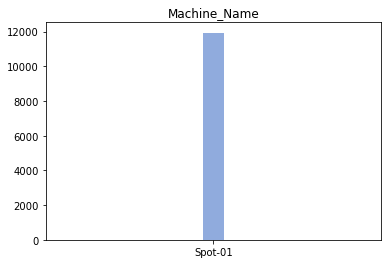

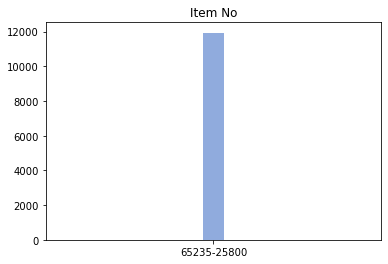

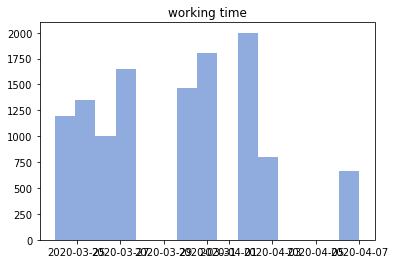

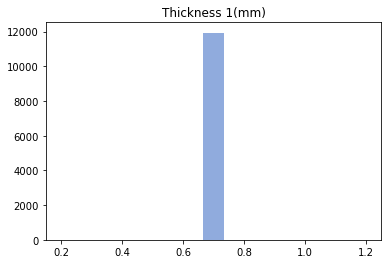

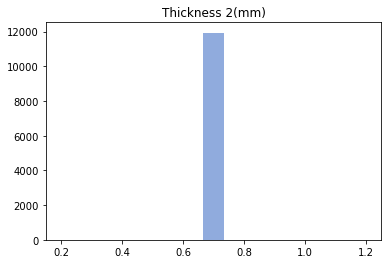

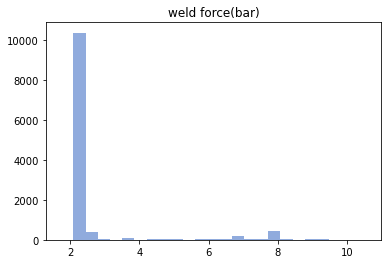

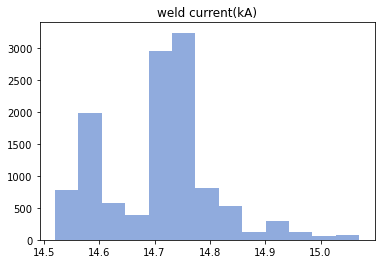

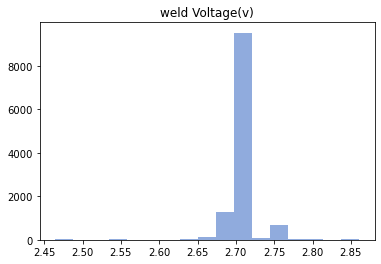

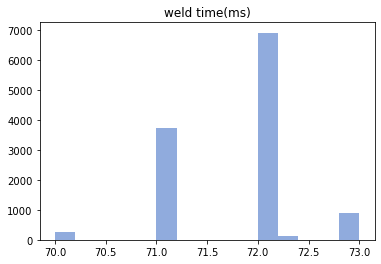

In [7]:
## 히스토그램을 그리기 위한 for 구문
b = [15,15,15,15,15,25,13,17,15]
for index, value in enumerate(welding_data.columns):
    plt.figure(index)
    plt.hist(welding_data[value], bins = b[index], facecolor = (144 /255,171 /255,221 /255))
    plt.title(value)


In [8]:
## 용접기 데이터에서 필요없는 부분(생산품목, 작업시간, 소재두께)들을 제외
new_welding_data = welding_data.iloc[:, 5:]
new_welding_data.head()  #결과는 아래에서 확인 가능하다.

,weld force(bar),weld current(kA),weld Voltage(v),weld time(ms)
idx,,,,
1,2.33,14.57,2.701,72.0
2,2.36,14.57,2.701,72.0
3,2.37,14.54,2.703,71.0
4,2.37,14.54,2.703,72.0
5,2.36,14.56,2.704,72.0


In [9]:
## sklearn의 preprocessing모듈에 들어있는 MinMaxScaler함수를 이용해 정규화 적용
scaler = preprocessing.MinMaxScaler()
scaler.fit(new_welding_data)
scaled_data = scaler.transform(new_welding_data)

In [10]:
## AutoEncoder 클래스 구현 
class AutoEncoder(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(AutoEncoder, self).__init__()
        ## initialize
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        ##오토인코더 구현
        self.AutoEncoder = nn.Sequential(
        ## 인코더 부분
        nn.Linear(input_size, hidden_size[0]),
        nn.RReLU(),
        nn.Linear(hidden_size[0], output_size),
        nn.RReLU(),
        ## 디코더 부분
        nn.Linear(output_size, hidden_size[0]),
        nn.RReLU(),
        nn.Linear(hidden_size[0], input_size)
        )
    def forward(self, inputs): 
        output =self.AutoEncoder(inputs)
   
        return output

In [11]:
##기존이 데이터를 텐서 형태로 변환, 그리고 훈련세트와 테스트세트로 나눔
train_data = torch.Tensor(scaled_data[:8470]) ## [:8470] 처음부터 8469번까지의 데이터를 훈련세트로 지정  
print(len(train_data))
test_data = torch.Tensor(scaled_data[8470:]) ## [8470:] 8470번째 데이터부터 끝까지를 테스트세트로 지정
print(len(test_data))  #결과는 아래에서 확인 가능하다.

8470
3469


In [12]:
## 훈련 하이퍼파라미터
epoch =50
batch_size =64
lr =0.01
## 모델 하이퍼파라미터
input_size =len(train_data[0])
hidden_size = [3]
output_size =2
## 손실 함수로 제곱근 오차 사용
criterion = nn.MSELoss()
## 매개변수 조정 방식으로 Adam사용
optimizer = torch.optim.Adam
##오토인코더 정의
AutoEncoder = AutoEncoder(input_size, hidden_size, output_size) 

In [13]:
## 학습 함수에 대한 정의
def train_net(AutoEncoder, data, criterion, epochs, lr_rate =0.01):
## Optimizer에 대한 정의
    optim = optimizer(AutoEncoder.parameters(), lr =lr_rate)
## 배치 학습을 시키기 위한 데이터 변환
    data_iter = DataLoader(data, batch_size =batch_size, shuffle =True)
## 에포크 학습
    for epoch in range(1, epochs +1):
        running_loss =0.0
        for x in data_iter:
            ## 매개변수 0으로 초기화
            optim.zero_grad()
            output = AutoEncoder(x)
            ## 입력값과 출력값간의 차이인 손실값 
            loss = criterion(x, output)
            ## 손실값을 기준으로 매개변수 조정
            loss.backward()
            optim.step()
            running_loss += loss.item()
            
        ## 각 에포크마다 손실 값 표기
        print("epoch: {}, loss: {:.2f}".format(epoch, running_loss))
    return AutoEncoder

In [14]:
## 학습 함수를 이용한 오토인코더 학습
AutoEncoder = train_net(AutoEncoder, train_data, criterion, epoch, lr)

epoch: 1, loss: 7.35
epoch: 2, loss: 1.81
epoch: 3, loss: 0.84
epoch: 4, loss: 0.67
epoch: 5, loss: 0.50
epoch: 6, loss: 0.40
epoch: 7, loss: 0.36
epoch: 8, loss: 0.35
epoch: 9, loss: 0.34
epoch: 10, loss: 0.32
epoch: 11, loss: 0.32
epoch: 12, loss: 0.30
epoch: 13, loss: 0.30
epoch: 14, loss: 0.30
epoch: 15, loss: 0.29
epoch: 16, loss: 0.29
epoch: 17, loss: 0.30
epoch: 18, loss: 0.29
epoch: 19, loss: 0.29
epoch: 20, loss: 0.28
epoch: 21, loss: 0.28
epoch: 22, loss: 0.28
epoch: 23, loss: 0.29
epoch: 24, loss: 0.28
epoch: 25, loss: 0.28
epoch: 26, loss: 0.28
epoch: 27, loss: 0.27
epoch: 28, loss: 0.28
epoch: 29, loss: 0.28
epoch: 30, loss: 0.28
epoch: 31, loss: 0.28
epoch: 32, loss: 0.28
epoch: 33, loss: 0.28
epoch: 34, loss: 0.28
epoch: 35, loss: 0.28
epoch: 36, loss: 0.27
epoch: 37, loss: 0.27
epoch: 38, loss: 0.28
epoch: 39, loss: 0.28
epoch: 40, loss: 0.27
epoch: 41, loss: 0.28
epoch: 42, loss: 0.28
epoch: 43, loss: 0.28
epoch: 44, loss: 0.27
epoch: 45, loss: 0.28
epoch: 46, loss: 0.

In [15]:
## 훈련세트의 손실값 이용한 임계값 정의
train_loss_chart = []
for data in train_data:
    output = AutoEncoder(data)
    loss = criterion(output, data)
    train_loss_chart.append(loss.item())
    
threshold = np.mean(train_loss_chart) + np.std(train_loss_chart)*8
print("Threshold :", threshold)  #결과는 아래에서 확인 가능하다.

Threshold : 0.07766848643760092


In [16]:
## 훈련세트의 손실값 이용한 임계값 정의
test_loss_chart = []
for data in test_data:
    output = AutoEncoder(data)
    loss = criterion(output, data)
    test_loss_chart.append(loss.item())

outlier = list(test_loss_chart >= threshold)
outlier.count(True)  #결과는 아래에서 확인 가능하다.

14

In [17]:
len(test_loss_chart)

3469